#Методичка

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

In [158]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [159]:
y.head()

,Unnamed: 0,0
0,0,101.159902
1,1,78.442913
2,2,-159.238195
3,3,120.719533
4,4,2.920673


In [160]:
x = pd.read_csv('x.csv', index_col=0)['0']
y = pd.read_csv('y.csv', index_col=0)['0']

In [161]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [162]:
y.head()

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
4      2.920673
Name: 0, dtype: float64

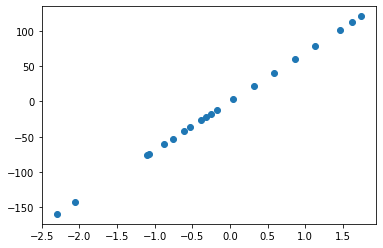

In [163]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [164]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
      return self.b0 + self.b1 * x

    def error(self, X, Y):    
      return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def fit(self, X, Y):  
      alpha = 0.1
      dJ0 = sum(self.predict(X) - Y) /len(X)
      dJ1 = sum((self.predict(X) - Y) * X) /len(X)
      self.b0 -= alpha * dJ0
      self.b1 -= alpha * dJ1

In [165]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


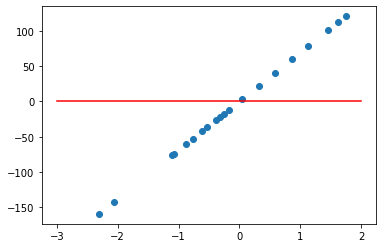

In [166]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [167]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [168]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)


error after gradient descent: 2.776975306057215e-06


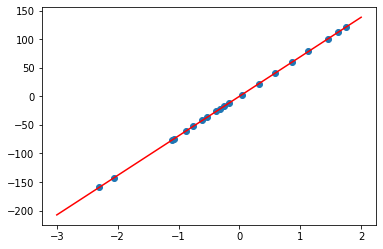

In [169]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

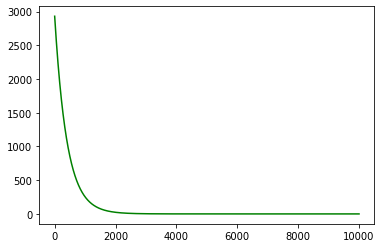

In [170]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#Домашнее задание

In [171]:
df = pd.read_csv('data.csv').iloc[:100]
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


#Отношение площади к цене

In [172]:
square = df['Square']
square.head()

0    115.027311
1     39.832524
2     78.342215
3     40.409907
4     64.285067
Name: Square, dtype: float64

In [173]:
price = df['Price']
price.head()

0    305018.871089
1    177734.553407
2    282078.720850
3    168106.007630
4    343995.102962
Name: Price, dtype: float64

In [174]:
hyp = Model()
steps, errors = hyp.fit(square, price,alpha=0.00001)
J = hyp.error(square, price)
print("error after gradient descent:", J)

error after gradient descent: 3282256333.359406


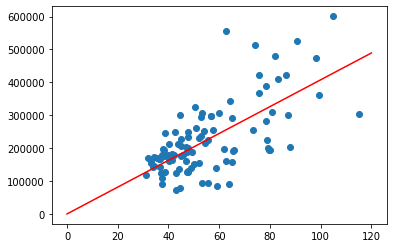

In [175]:
X0 = np.linspace(0, 120, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(square, price)
plt.plot(X0, Y0, 'r')
plt.show()

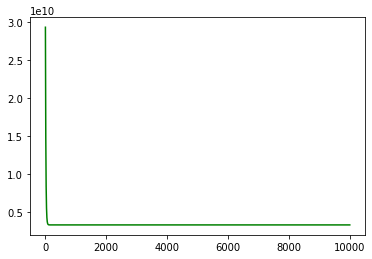

In [176]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [177]:
hyp = Model()
steps, errors = hyp.fit(square, price,alpha = 0.1)
J = hyp.error(square, price)
print("error after gradient descent:", J)

error after gradient descent: nan


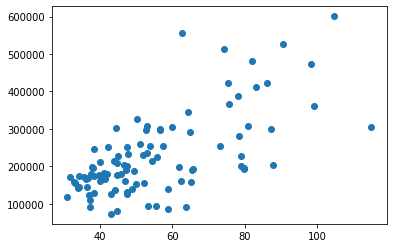

In [178]:
X0 = np.linspace(0, 120, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(square, price)
plt.plot(X0, Y0, 'r')
plt.show()

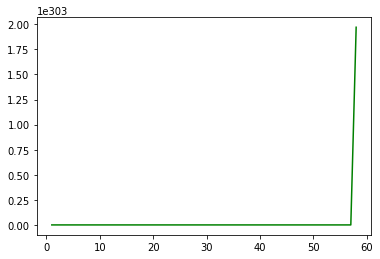

In [179]:
plt.figure()
plt.plot(steps, errors, 'green')
plt.show()

#Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов

In [180]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def is_correct(self,X):
      try:
        if X.shape[1] != 1:
          raise Exception
        else:         
            X = X.iloc[:,0]
            return X
      except:
        return X        
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.1, accuracy=0.1, max_steps=5000):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        steps, errors = [], []
        step = 0        
        for _ in range(500):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [181]:
x = pd.read_csv('x.csv',index_col = 0)
y = pd.read_csv('y.csv',index_col = 0)

In [182]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.658624426653096e-27


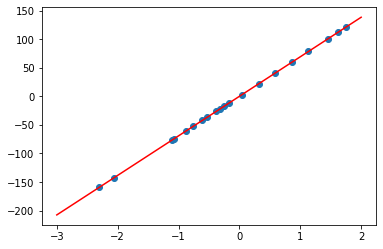

In [183]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

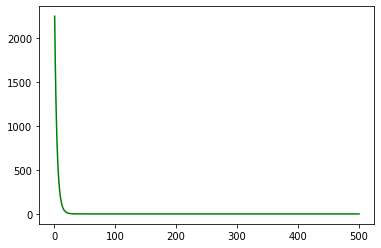

In [184]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [185]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def is_correct(self,X):
      try:
        if X.shape[1] != 1:
          raise Exception
        else:         
            X = X.iloc[:,0]
            return X
      except:
        return X        
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.1, accuracy=0.1, max_steps=5000,stop = 0.00001):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err < stop:
              break
        return steps, errors

In [186]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 9.565425563974357e-06


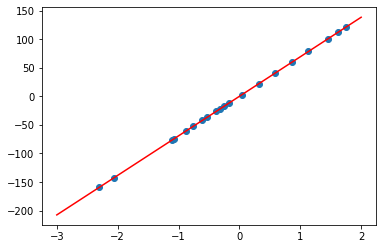

In [187]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

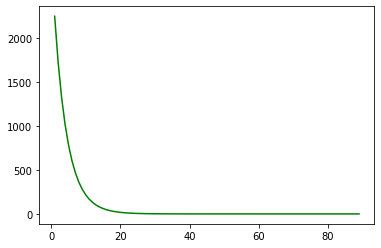

In [188]:
plt.figure()
plt.plot(steps, errors, 'green')
plt.show()

Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [189]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def is_correct(self,X):
      try:
        if X.shape[1] != 1:
          raise Exception
        else:         
            X = X.iloc[:,0]
            return X
      except:
        return X        
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, accuracy=0.1, max_steps=5000,stop = 0.00001):
        err_save = 0
        alpha = 1
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            if new_err > err_save:
              aplpa = alpha / 2
            err_save = new_err
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err < stop:
              break
        return steps, errors

In [190]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5.994964160459718e-06


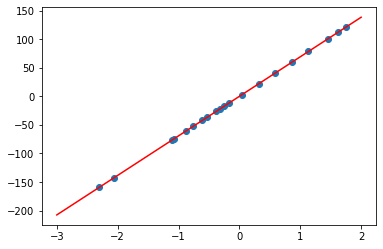

In [191]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

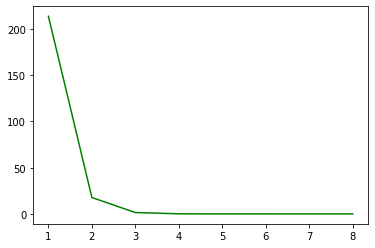

In [192]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [193]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def to_plot(self,x,y):
      X0 = np.linspace(-3, 2, 100)
      Y0 = hyp.predict(X0)
      plt.figure()
      plt.scatter(x, y)
      plt.plot(X0, Y0, 'r')
      plt.xlim(-10,10)
      plt.ylim(-300,300)
      plt.show()
      plt.figure()
      plt.plot(steps, errors, 'g')
      plt.xlim(0,20)
      plt.ylim(0,200)
      plt.show()  
    def is_correct(self,X):
      try:
        if X.shape[1] != 1:
          raise Exception
        else:         
            X = X.iloc[:,0]
            return X
      except:
        return X        
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, accuracy=0.1, max_steps=5000,stop = 0.00001):
        err_save = 0
        alpha = 1
        X = self.is_correct(X)
        Y = self.is_correct(Y)
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            if new_err > err_save:
              aplpa = alpha / 2
            err_save = new_err
            step += 1            
            steps.append(step)
            errors.append(new_err)
            if new_err < stop:
              break
        return steps, errors

In [194]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5.994964160459718e-06


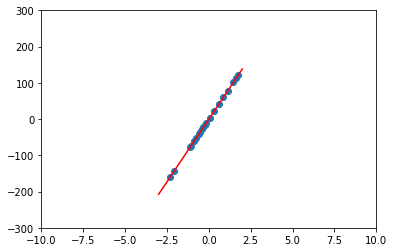

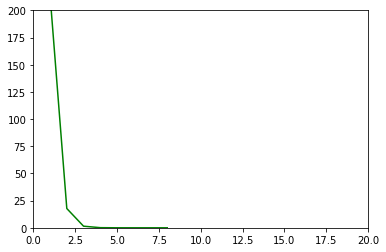

In [195]:
hyp.to_plot(x,y)